## Risk Reward Analysis

In [3]:
import os
import pandas as pd
import yfinance as yf

# Create a folder named "data" if it doesn't exist
data_folder = "data"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

# Define the list of stock symbols
stock_symbols = ['AAVAS.NS', 'BCLIND.NS', 'RICOAUTO.NS', 'HUDCO.NS', 'ONGC.NS']

# Download stock data using yfinance and save as CSV files
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    data = stock.history(period="max")
    data['Symbol'] = symbol  # Add column for stock symbol
    data.to_csv(os.path.join(data_folder, f"{symbol}_data.csv"))

print("Data downloaded and saved in the 'data' folder.")


/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construc

Data downloaded and saved in the 'data' folder.


In [4]:
descriptive_stats = stocks_data.groupby('Symbol')['Close'].describe()
print(descriptive_stats)

NameError: name 'stocks_data' is not defined

In [5]:
import yfinance as yf

# Define the list of stock symbols
stock_symbols = ['AAVAS.NS', 'BCLIND.NS', 'RICOAUTO.NS', 'HUDCO.NS', 'ONGC.NS']

# Initialize an empty DataFrame
stocks_data = pd.DataFrame()

# Download stock data using yfinance and concatenate into a single DataFrame
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    data = stock.history(period="max")
    data['Symbol'] = symbol  # Add a column to identify the stock
    stocks_data = pd.concat([stocks_data, data])

# Now you can perform operations on stocks_data
descriptive_stats = stocks_data.groupby('Symbol')['Close'].describe()
print(descriptive_stats)


/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construc

              count         mean         std         min          25%  \
Symbol                                                                  
AAVAS.NS     1365.0  1775.919889  545.304239  635.099976  1425.449951   
BCLIND.NS     771.0    39.437052   15.580851    9.633704    30.045852   
HUDCO.NS     1709.0    46.065519   32.311900   13.823792    30.033072   
ONGC.NS      7108.0    75.372386   53.448034    3.416595    15.877181   
RICOAUTO.NS  5412.0    37.144588   25.558683    3.599406    14.931028   

                     50%          75%          max  
Symbol                                              
AAVAS.NS     1665.050049  2201.899902  3195.800049  
BCLIND.NS      39.006741    47.522104    83.150002  
HUDCO.NS       36.245335    50.515114   211.699997  
ONGC.NS        84.476189   113.467482   283.750000  
RICOAUTO.NS    34.341335    53.429768   152.600006  



AAPL (Apple Inc.)
- Count: 252.0 (The number of observations or trading days included in the dataset for AAPL)
- Mean: 180.75 (The average closing price)
- Standard Deviation: 8.80 (Measures the amount of variation or dispersion of closing prices)
- Minimum: 162.89 (The lowest closing price in the dataset)
- 25th Percentile: 173.22 (25% of the closing prices are below this value)
- Median (50%): 180.04 (The middle value of the closing prices)
- 75th Percentile: 188.87 (75% of the closing prices are below this value)
- Maximum: 197.85 (The highest closing price in the dataset)


## Time Series Analysis


Time Series Analysis to examine trends and patterns over time, focusing on the closing prices:

In [6]:
# Assuming the 'Date' column is in the index, reset the index
stocks_data.reset_index(inplace=True)

# Convert the 'Date' column to datetime format
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])

# Pivot the DataFrame
pivot_data = stocks_data.pivot(index='Date', columns='Symbol', values='Close')


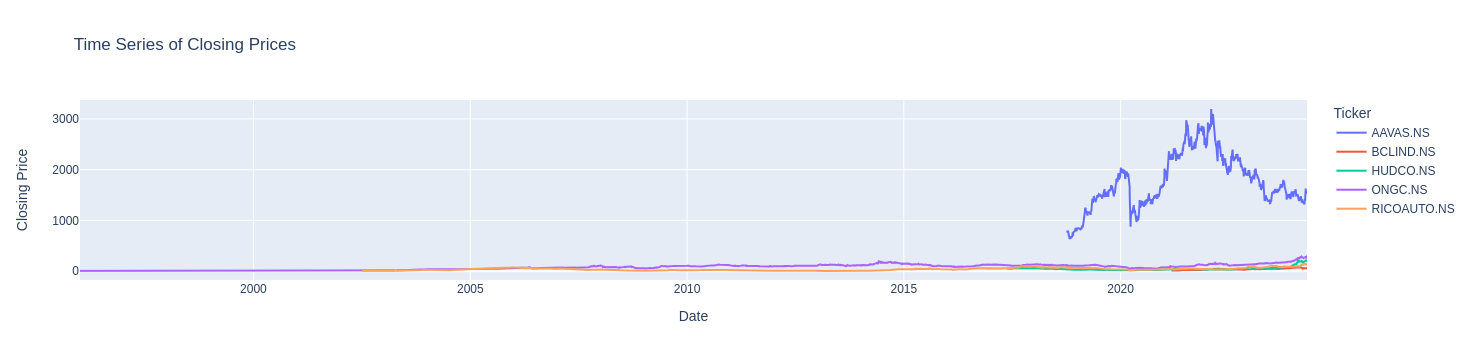

In [9]:
# Time Series Analysis
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
pivot_data = stocks_data.pivot(index='Date', columns='Symbol', values='Close')

# Create a subplot
fig = make_subplots(rows=1, cols=1)

# Add traces for each stock ticker
for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

# Update layout
fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)


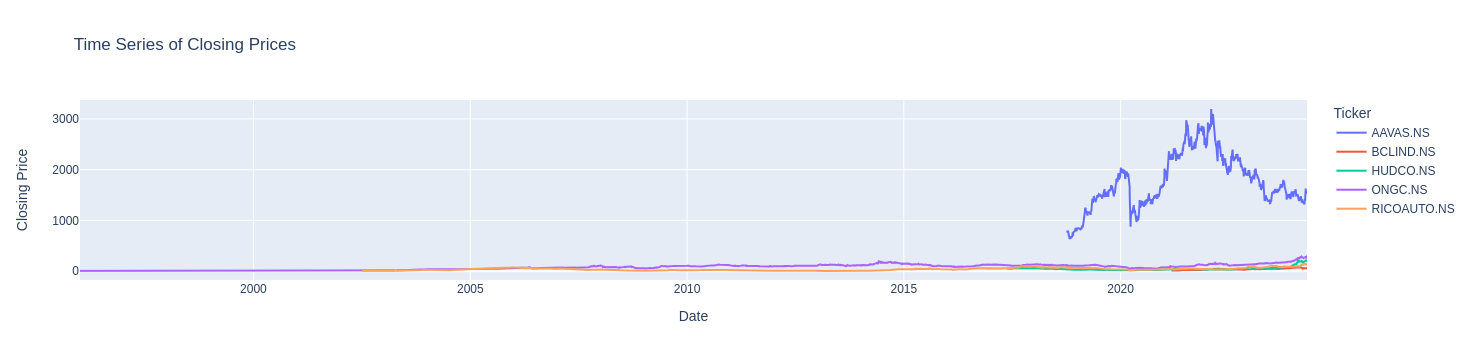

In [10]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Import make_subplots function

# Time Series Analysis
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
pivot_data = stocks_data.pivot(index='Date', columns='Symbol', values='Close')

# Create a subplot
fig = make_subplots(rows=1, cols=1)

# Add traces for each stock ticker
for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

# Update layout
fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)


#### Comparative Performance: When comparing the stocks, MSFT and NFLX generally trade at higher price levels than AAPL and GOOG in this dataset.

## Volatility Analysis
Next, let’s focus on Volatility Analysis. We’ll calculate and compare the volatility (standard deviation) of the closing prices for each stock. It will give us an insight into how much the stock prices fluctuated over the period:

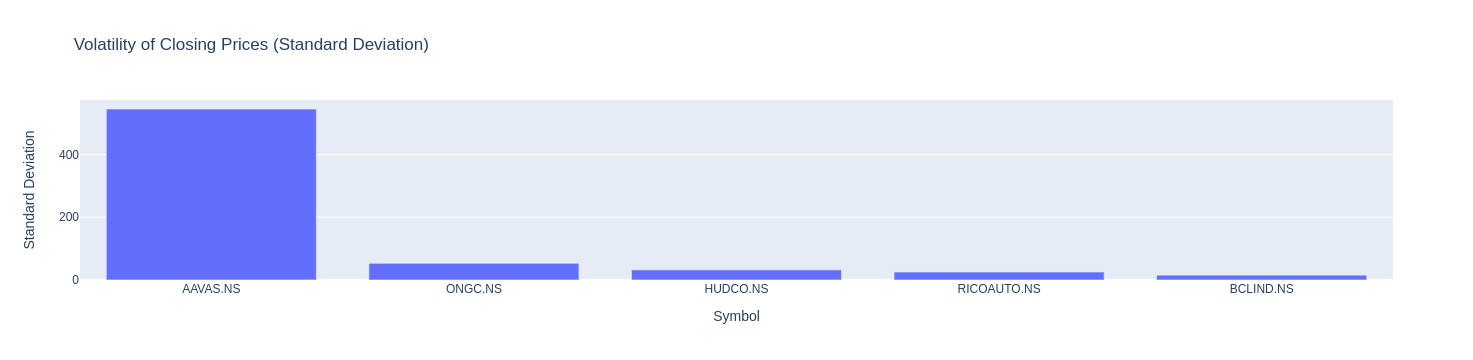

In [12]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px  # Import plotly.express module

# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')

# Show the plot
fig.show()


The bar chart and the accompanying data show the volatility (measured as standard deviation) of the closing prices for each stock. Here’s how they rank in terms of volatility:

- MSFT: Highest volatility with a standard deviation of approximately 39.26.
- AMZN: Next highest, with a standard deviation of around 21.53.
- GOOGL: Lower volatility compared to AMZN and MSFT, with a standard deviation of about 11.79.
- AAPL: The least volatile in this set, with a standard deviation of approximately 8.87.

It indicates that AMZN and MSFT stocks were more prone to price fluctuations during this period compared to AAPL and GOOG.

## Correlation Analysis
Next, we’ll perform a Correlation Analysis to understand how the stock prices of these companies are related to each other:

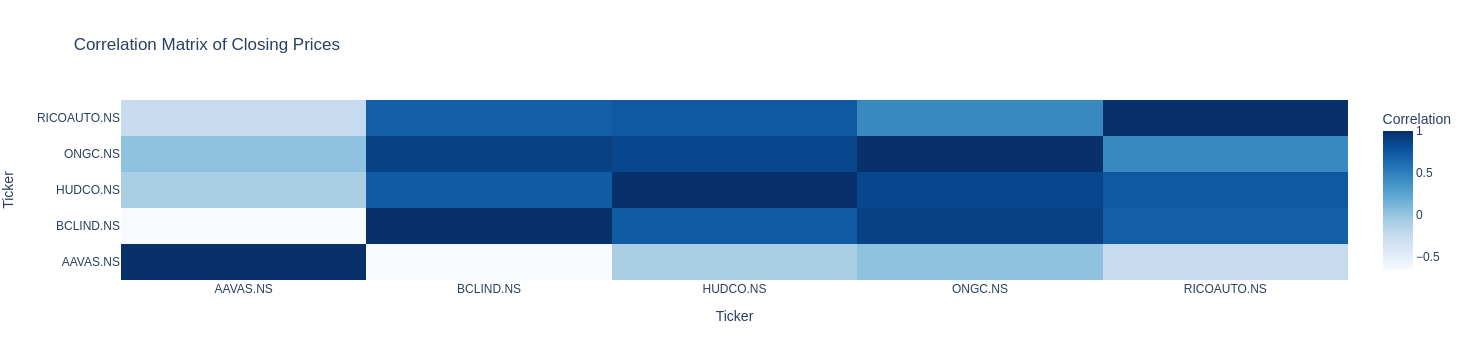

In [13]:
# Correlation Analysis
correlation_matrix = pivot_data.corr()

fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

# Update layout
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)
fig.show()

- Values close to +1 indicate a strong positive correlation, meaning that as one stock’s price increases, the other tends to increase as well.
- Values close to -1 indicate a strong negative correlation, where one stock’s price increase corresponds to a decrease in the other.
- Values around 0 indicate a lack of correlation.

From the heatmap, we can observe that there are varying degrees of positive correlations between the stock prices, with some pairs showing stronger correlations than others. For instance, AAPL and MSFT seem to have a relatively higher positive correlation.

## Daily Risk Vs. Return Analysis
To perform a Risk vs. Return Analysis, we will calculate the average daily return and the standard deviation of daily returns for each stock. The standard deviation will serve as a proxy for risk, while the average daily return represents the expected return.

We will then plot these values to visually assess the risk-return profile of each stock. Stocks with higher average returns and lower risk (standard deviation) are generally more desirable, but investment decisions often depend on the investor’s risk tolerance:

/tmp/ipykernel_20684/202357798.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



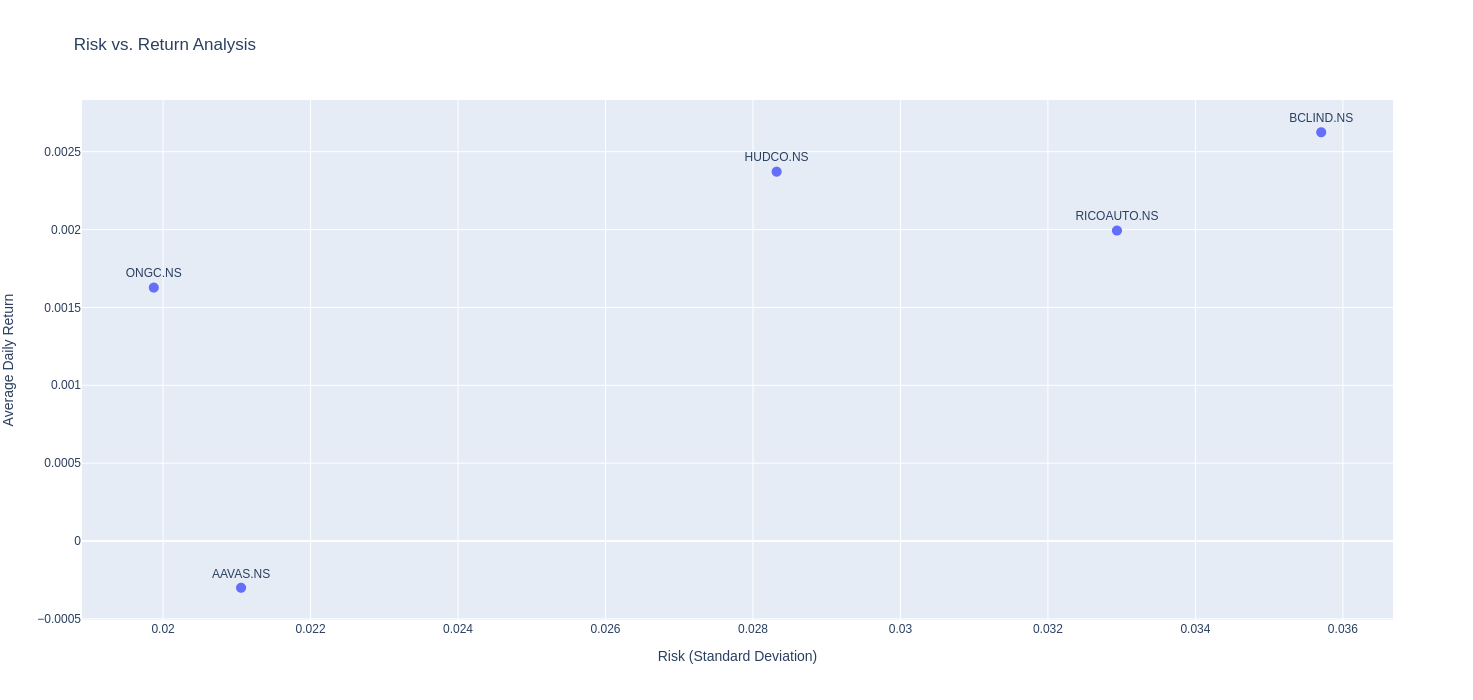

In [18]:
daily_returns = pivot_data.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False,
    height=700
)


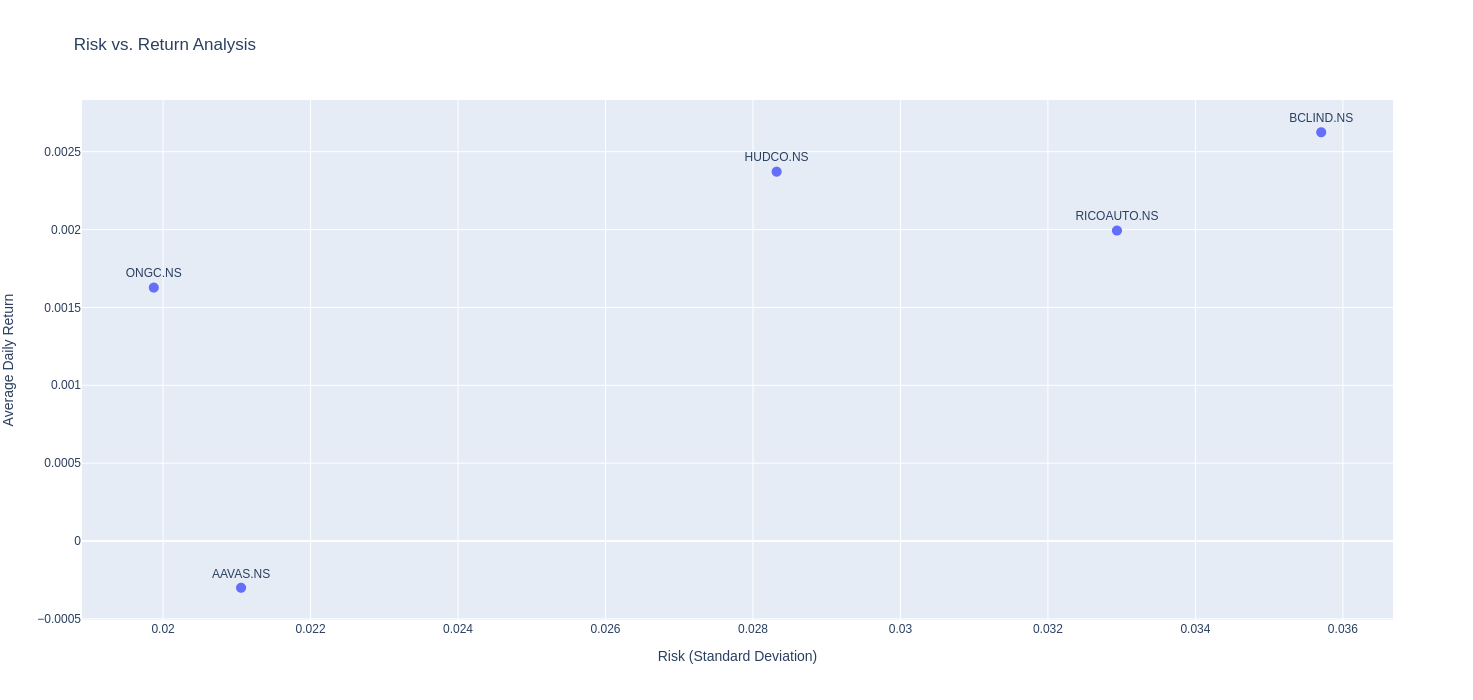

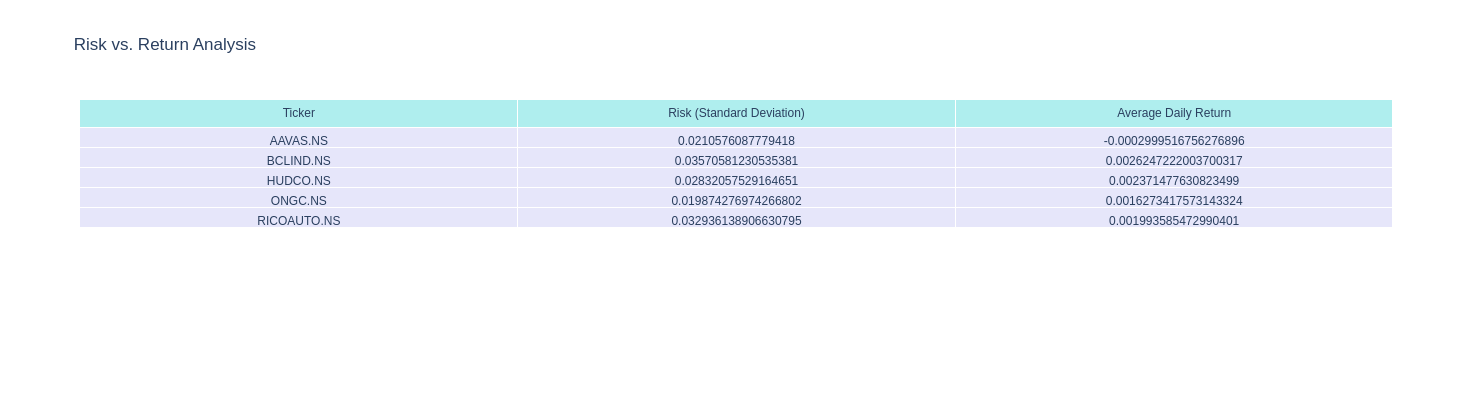

In [27]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you already have defined daily_returns, avg_daily_return, and risk

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

# Create scatter plot
scatter_fig = go.Figure()

# Add scatter plot points
scatter_fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout for scatter plot
scatter_fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False,
    height=700
)

# Create table
table_fig = go.Figure(data=[go.Table(
    header=dict(values=["Ticker", "Risk (Standard Deviation)", "Average Daily Return"],
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[risk_return_df.index, risk_return_df['Risk'], risk_return_df['Average Daily Return']],
               fill_color='lavender',
               align='center')
)])

# Update layout for table
table_fig.update_layout(
    title='Risk vs. Return Analysis',
    showlegend=False,
    height=400
)

# Display figures with space between them
scatter_fig.show()
print('\n\n')  # Adding space between the plots
table_fig.show()

# Save plots as HTML files
scatter_fig.write_html("scatter_plot.html")
table_fig.write_html("table.html")